In [1]:
# Dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import sklearn
import sklearn.datasets
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingClassifier
np.set_printoptions(threshold=np.inf)

In [2]:
# read in train and test data
train = pd.read_csv("data/training_data.csv")
test = pd.read_csv("data/testing_data.csv")
trainNames = pd.read_csv("data/training_data_names.csv")
testNames = pd.read_csv("data/dataNames.csv")
train.drop(['Unnamed: 0'], axis=1, inplace=True)
test.drop(['Unnamed: 0'], axis=1, inplace=True)

In [7]:
# create data without label
data = train.drop("MVP_dummy", axis=1)

In [8]:
# train test split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, train['MVP_dummy'], random_state=42)

In [9]:
# I used a gradient boosting classifier as my model, this works well with highly correlated variables, which is the 
# case with most baseball data. Here I'm using the train data to train the model
model= GradientBoostingClassifier(n_estimators=10000, learning_rate=0.1, max_depth=1, random_state=0)
# Train the model using the training sets and check score
model.fit(X_train, y_train)
# R-squared is 1.0, best possible score
print(f"R-squared = {model.score(X_train,y_train)}")
#Predict Output
predicted= model.predict(X_train)
res = y_train - predicted
rmse = math.sqrt(sum(res**2))
# RMSE = 0.0, best possible score
print(f"RMSE = {rmse}" )
print(predicted[:100])
print(y_train.tolist()[:100])
results = pd.DataFrame({"playerid": X_train['playerid'], "Prediction": predicted, "Actual": y_train, "yearID": X_train['yearID'], 'lgID': X_train['lgID_y']}).reset_index(drop=True)


R-squared = 1.0
RMSE = 0.0
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]


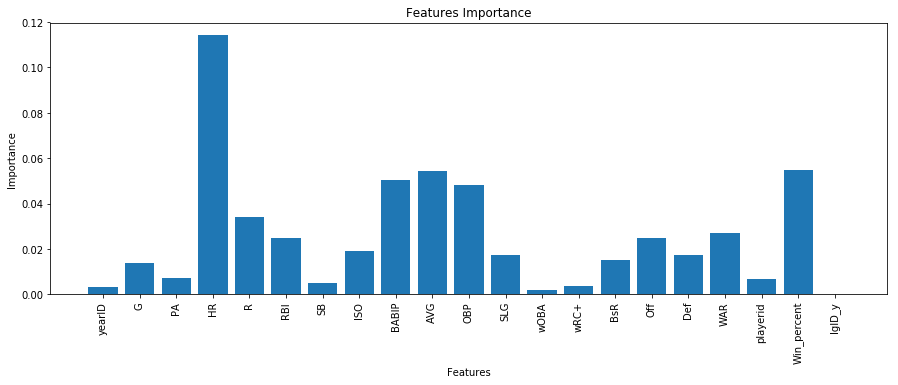

In [10]:
# plot model feature importance, showing the impact of each independent variable on the likelihood of winning the MVP
# interesting to see that HR has the highest impact, and winning percentage was the second most impact of any feature
# this plot shows what the MVP voters have cared about most over the past 20 years
plt.figure(1, figsize=(15, 5))
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
labels = list(X_train)
plt.xticks(range(len(model.feature_importances_)), labels, rotation='vertical')
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Features Importance")
plt.show()

In [11]:
# Here's the table of the predicted vs actual results. Each of the predictions made are correct.
winners = results.loc[results['Actual'] == 1]
winnersNames = pd.merge(winners, trainNames, on=['playerid', 'yearID'], how='inner').drop_duplicates()
winnersNames = pd.DataFrame({"Actual": winnersNames['Actual'], 'Prediction': winnersNames['Prediction'], 'Name': winnersNames['Name'], 'Year': winnersNames['yearID']})
winnersNames

,Actual,Name,Prediction,Year
0,1,Barry Bonds,1,2002
1,1,Alex Rodriguez,1,2005
2,1,Bryce Harper,1,2015
3,1,Ivan Rodriguez,1,1999
4,1,Alex Rodriguez,1,2007
5,1,Jason Giambi,1,2000
6,1,Miguel Tejada,1,2002
7,1,Juan Gonzalez,1,1998
8,1,Andrew McCutchen,1,2013
9,1,Mike Trout,1,2014


In [16]:
# Here we are using the testing data from the train test split
model= GradientBoostingClassifier(n_estimators=10000, learning_rate=0.1, max_depth=1, random_state=0)
# Train the model using the training sets and check score
model.fit(X_test, y_test)
# R-squared is 1.0, best possible score
print(f"R-squared = {model.score(X_train,y_train)}")
#Predict Output
predicted= model.predict(X_test)
res = y_test - predicted
rmse = math.sqrt(sum(res**2))
# RMSE = 0.0, best possible score
print(f"RMSE = {rmse}" )
print(predicted[:100])
print(y_test.tolist()[:100])
results = pd.DataFrame({"playerid": X_test['playerid'], "Prediction": predicted, "Actual": y_test, "yearID": X_test['yearID'], 'lgID': X_test['lgID_y']}).reset_index(drop=True)


R-squared = 0.9846407021393307
RMSE = 0.0
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


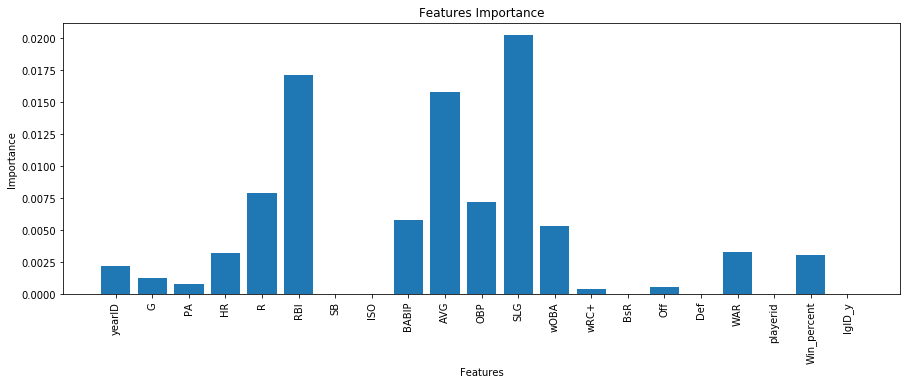

In [17]:
# It was interesting to see slightly different R-squared values, but even more interesting are the differing importance
# values for the features as compared to the test data. Here we see larger values across the board, along with slugging
# and RBI as the most important features. HR and win% are way down in the rankings.
plt.figure(1, figsize=(15, 5))
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
labels = list(X_train)
plt.xticks(range(len(model.feature_importances_)), labels, rotation='vertical')
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Features Importance")
plt.show()

In [26]:
# Here's the table of the predicted vs actual results. Each of the predictions made are correct.
winners = results.loc[results['Actual'] == 1]
winnersNames = pd.merge(winners, trainNames, on=['playerid', 'yearID'], how='left').drop_duplicates()
winnersNames = pd.DataFrame({"Actual": winnersNames['Actual'], 'Prediction': winnersNames['Prediction'], 'Name': winnersNames['Name'], 'Year': winnersNames['yearID']})
winnersNames

,Actual,Name,Prediction,Year
0,1,Ryan Braun,1,2011
1,1,Sammy Sosa,1,1998
2,1,Miguel Cabrera,1,2013
3,1,Jeff Kent,1,2000
4,1,Alex Rodriguez,1,2003
5,1,Albert Pujols,1,2008
6,1,Josh Hamilton,1,2010
7,1,Barry Bonds,1,2004
8,1,Albert Pujols,1,2005


In [19]:
# Time to create predictions using the model with 2018 data
X_test_2018 = test.drop("MVP_dummy", axis=1)
y_test_2018 = test['MVP_dummy']
print(X_test.shape, y_test.shape)

(608, 21) (608,)


In [20]:
# predict using model.predict_proba(). This creates a probability of each player input's likelihood of winning the MVP
predict = model.predict_proba(X_test_2018)
predict = pd.DataFrame(predict, columns = ["prob", "non-prob"])
results = pd.DataFrame({"playerid": X_test_2018['playerid'], "prob": predict['prob'], 'lgID': X_test_2018['lgID_y']})
# results['prob'] = (1-results['prob'])*100
results = results.sort_values(by = 'prob')
NL = results.loc[results['lgID'] == 1]
AL = results.loc[results['lgID'] == 0]

In [21]:
# More data cleaning here, and selecting the top 10 probabilities from each league
ALtop10 = AL.head(6).reset_index(drop=True)
NLtop10 = NL.head().reset_index(drop=True)

testingNames = pd.DataFrame({"playerid": testNames['playerid'], 'Name': testNames['Name']})
testingNames

mergedAL = pd.merge(ALtop10, testingNames, on = ['playerid'], how='inner').drop_duplicates()
mergedNL = pd.merge(NLtop10, testingNames, on = ['playerid'], how='inner').drop_duplicates()
mergedAL['prob'] = (1-mergedAL['prob'])*100
mergedNL['prob'] = (1-mergedNL['prob'])*100

In [22]:
# Here are the results. Both races are not very close, with Mookie Betts and Christian Yelich as the front runners for
# each league. Each finalist is represented except Nolan Arenado and Jose Ramirez (He was 6th most likely, and Manny 
# Machado should be removed from contention).  
print(mergedAL)
print(mergedNL)

    lgID  playerid       prob             Name
0      0     13611  99.982263     Mookie Betts
4      0     13510  36.414740     Jose Ramirez
7      0     10155  12.253241       Mike Trout
14     0     12161   4.016532  Xander Bogaerts
19     0     11493   0.276674    Manny Machado
24     0      6184   0.063171    J.D. Martinez
    lgID  playerid       prob              Name
0      1     11477  99.987602  Christian Yelich
5      1      9777   0.000580     Nolan Arenado
10     1     12979   0.000065       Javier Baez
12     1      7859   0.000018  Charlie Blackmon
17     1     12861   0.000014    Anthony Rendon


0        Mookie Betts
4        Jose Ramirez
7          Mike Trout
14    Xander Bogaerts
19      Manny Machado
24      J.D. Martinez
Name: Name, dtype: object
0     99.982263
4     36.414740
7     12.253241
14     4.016532
19     0.276674
24     0.063171
Name: prob, dtype: float64


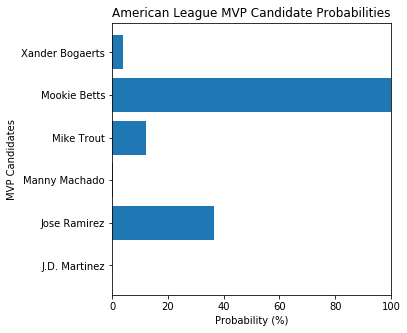

In [23]:
# graph showing probabiliites as horizontal bar graphs for AL race
X = mergedAL['Name']
y = mergedAL['prob']
print(X)
print(y)

plt.figure(figsize=(5, 5))
plt.barh(X, y)

plt.xlabel("Probability (%)")
plt.ylabel("MVP Candidates")
plt.title("American League MVP Candidate Probabilities")

plt.xlim(0, 100)
plt.show()

0     Christian Yelich
5        Nolan Arenado
10         Javier Baez
12    Charlie Blackmon
17      Anthony Rendon
Name: Name, dtype: object
0     99.987602
5      0.000580
10     0.000065
12     0.000018
17     0.000014
Name: prob, dtype: float64


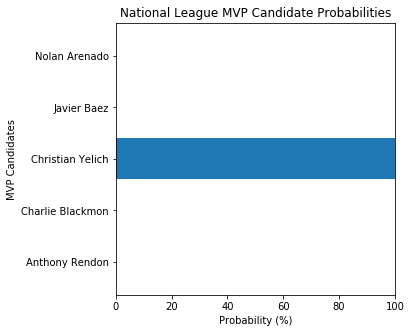

In [24]:
# graph showing probabiliites as horizontal bar graphs for NL race
X = mergedNL['Name']
y = mergedNL['prob']
print(X)
print(y)

plt.figure(figsize=(5, 5))
plt.barh(X, y)

plt.xlabel("Probability (%)")
plt.ylabel("MVP Candidates")
plt.title("National League MVP Candidate Probabilities")


plt.xlim(0, 100)
plt.show()